## Exploring linguistic laws using `spacy` across languages
In this tutorial, we will apply what you have learned about processing text using `spacy` to see whether we can replicate certain "linguistic laws" concerning the statistical properties of language use. 

**First steps**  
1. Import necessary libraries

In [ ]:
import spacy #full natural language processing nlp python  text(string)-->toeknization_-> lemmatization recognizes the connection between two tokens eg. cat and cats lemmatized as cat-->sematize-represent some meaning and then syntactic parsing to 
import pandas as pd
from numpy import log


2. Download the necessary language models using `spacy.download`


| Model           | Description |
|-----------------|-------------|
|`en_core_web_sm` | English models based on web text |
|`es_core_news_sm`| Spanish models based on news articles |
|`ja_core_news_sm`| Japanese models based on news articles |

To download the language models in Google Colab, we use shell/terminal-style commands. 

```
!python3 -m spacy download <your desired model>
```
- Note that the line is prefixed with `!`. 
- `python3` invokes python. 
- `-m` indicates that a module will be loaded, where that module appears as the next string (in this case `spacy`). 
- `download` is a function called from `spacy`. 
- The following string (e.g., `en_core_web_sm`) is an argument indicating which model should be downloaded
- `--quiet` supresses unnecessary download information (logs that track the status of each element being downloaded)  

In [ ]:
# Download libraries
## English
!python3 -m spacy download en_core_web_md --quiet  #english one comes from web  #changed sm to md since sm has no vectors

## Spanish 
!python3 -m spacy download es_core_news_sm --quiet #rest comes from news papers

## Japanese 
!python3 -m spacy download ja_core_news_sm --quiet


2022-12-02 20:59:21.868192: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     |████████████████████████████████| 42.8 MB 1.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
2022-12-02 20:59:36.951434: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     |████████████████████████████████| 12.9 MB 1.8 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
2022-12-02 20:59:48.107983: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     |████████████████████████████████| 12.0 MB 5.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('ja_core_news_sm')


Once we download the models, we also need to load them. We load the models using `.load(<model>)`, as in

```nlp_en = spacy.load("en_core_web_sm")```

We do this for each language. 

In [ ]:
# English
nlp_en = spacy.load("en_core_web_sm")  #nlp_en -->nlp english  spacy.load to load the model and include string inside the spacy model

# Spanish
nlp_sp = spacy.load("es_core_news_sm")

# Japanese
nlp_jp = spacy.load("ja_core_news_sm")


Now we define some sample sentences in each language...

In [ ]:
# Some sample sentences
english_sent = "The cat is on the mat."
spanish_sent = "El gato está en la alfombra."
japanese_sent = "猫はマットの上にいます。" # neko wa matto no ue ni imasu. 

... and process each sentence with the appropriate model.

In [ ]:
# Process the sentences
en_proc = nlp_en(english_sent)
sp_proc = nlp_sp(spanish_sent)
ja_proc = nlp_jp(japanese_sent)

The text is now processed, so we can access each level of annotation offered by the language model.

In [ ]:
for token in en_proc:
  print("English", token.orth_, token.lemma_, token.pos_, token.head.orth_,  token.dep_) 
# a Doc has a sentence level and word level, print the name of the language and then the token can be subject to .orth_(orthography pure token),   
#.lemma (provides the lemmatization for the word),no capitalization
#.pos (part of speech eg verb etc), 
#.head(for any given word, the head of word eg cat is the head in "the cat"(),
#.dep(what wod is the head and how are they related to each other)
#.head.orth_(eg " the cat, it processes "the" and gives cat),
#,dep (dependency
#DET -deteriner fo the relationship
#nsubj-->subjectof the noun)
#noun of the 
#verb
#punctuation


print("-"*20)

for token in sp_proc:
  print("Spanish", token.orth_, token.lemma_, token.pos_, token.head.orth_, token.dep_)

print("-"*20)

for token in ja_proc:
  print("Japanese", token.orth_, token.lemma_, token.pos_, token.head.orth_, token.dep_)


English The the DET cat det
English cat cat NOUN is nsubj
English is be AUX is ROOT
English on on ADP is prep
English the the DET mat det
English mat mat NOUN on pobj
English . . PUNCT is punct
--------------------
Spanish El el DET gato det
Spanish gato gato NOUN está nsubj
Spanish está estar VERB alfombra cop
Spanish en en ADP alfombra case
Spanish la el DET alfombra det
Spanish alfombra alfombra NOUN alfombra ROOT
Spanish . . PUNCT alfombra punct
--------------------
Japanese 猫 猫 NOUN い nsubj
Japanese は は ADP 猫 case
Japanese マット マット NOUN 上 nmod
Japanese の の ADP マット case
Japanese 上 上 NOUN い obl
Japanese に に ADP 上 case
Japanese い いる VERB い ROOT
Japanese ます ます AUX い aux
Japanese 。 。 PUNCT い punct


We can use `pandas` to create a nice-looking (and easy to export) dataframe. 

In [ ]:
jpn_dataframe = pd.DataFrame(columns = ['Language', 'Orthography', 'Lemma', 'PoS', 'Head.Word', 'Head.Dependency'])

i = 0
for sent in ja_proc.sents:
  for token in sent:
      # Add a row for each new word
      jpn_dataframe.loc[i] = ["Japanese", token.orth_, token.lemma_, token.pos_, token.head.orth_, token.dep_]
      i+=1

      #need to use .loc for rows, for columns not needed

jpn_dataframe

,Language,Orthography,Lemma,PoS,Head.Word,Head.Dependency
0,Japanese,猫,猫,NOUN,い,nsubj
1,Japanese,は,は,ADP,猫,case
2,Japanese,マット,マット,NOUN,上,nmod
3,Japanese,の,の,ADP,マット,case
4,Japanese,上,上,NOUN,い,obl
5,Japanese,に,に,ADP,上,case
6,Japanese,い,いる,VERB,い,ROOT
7,Japanese,ます,ます,AUX,い,aux
8,Japanese,。,。,PUNCT,い,punct


Let's define a class:

In [ ]:
class ProcText():  #process text
  def __init__(self, input_string, model):  #intializing the instance of this class( two arg be input)
    self.proc = model(input_string)  #create attribute for processing the string

  def tableize(self, language):  #define the model here
    df = pd.DataFrame(columns = ["Sent.ID", "Word.ID", "Language", "Word.Orthographic", "Word.Lemma", "Word.PoS", "Head.Word", "Head.Dependency"])  #sing the panda df for tables
    j=0    #for counting the sentences                        #sentence if for the group of the sentencs  # same as the function of the sentence ( we dont have to knwo the full count), #
    for sent in self.proc.sents: #go through the sentence
      i = 0  #within the sentence counting the word
      for word in sent:
        new_row = [j, word.idx, language, word.orth_, word.lemma_, word.pos_, word.head.orth_, word.dep_]
                      #.idx is for the index of the word, language coming from the local variable of the function
        df.loc[i] = new_row  #update the row
        i+=1
      j += 1
    return(df)


In [ ]:
proc = ProcText(japanese_sent, nlp_jp)  #(some input and model)

print(type(proc.proc))  #printing the type of the o/p
proc.tableize("Japanese")
#idx is at the character level and incorporates the space and i is at word level

<class 'spacy.tokens.doc.Doc'>


,Sent.ID,Word.ID,Language,Word.Orthographic,Word.Lemma,Word.PoS,Head.Word,Head.Dependency
0,0,0,Japanese,猫,猫,NOUN,い,nsubj
1,0,1,Japanese,は,は,ADP,猫,case
2,0,2,Japanese,マット,マット,NOUN,上,nmod
3,0,5,Japanese,の,の,ADP,マット,case
4,0,6,Japanese,上,上,NOUN,い,obl
5,0,7,Japanese,に,に,ADP,上,case
6,0,8,Japanese,い,いる,VERB,い,ROOT
7,0,9,Japanese,ます,ます,AUX,い,aux
8,0,11,Japanese,。,。,PUNCT,い,punct


We don't want to define all the sentences ourselves! Rather, we rely on naturalistic corpora -- collections of digitized text sampled from the *real world*. 

The `nltk` package contains many useful corpora. We can access them via `import` from the `nltk.corpus` module.

In [ ]:
import nltk
nltk.download(['knbc', 'cess_esp', 'brown'], quiet=True) #knbc, cess_esp and brown are the newspapaers 

from nltk.corpus import knbc, cess_esp, brown # download nad import the modules for use

#tagged _sents()--> [[(word, tag),   ]]

Let's take sample sentences from the corpora we have loaded. `nltk.corpus` objects have a number of useful methods:
- `.words()` gives a list of strings, where strings = words
- `.sents()` gives a list of lists of strings; each list element is a sentence composed of a list of word strings. 
- `.tagged_words()` gives a list of tuples of strings [(word, tag),...]
- `.tagged_sents()` gives a list of lists of tuples of strings [[(word, tag),...], [(word,tag),...]]


In [ ]:
# Extract a sample sentence from each corpus
en_sent = brown.sents()[1000]
jp_sent = knbc.sents()[1000]
es_sent = cess_esp.sents()[1000]

# Turn the list of words for each sentence into a string (spaced with " ")
en = " ".join(en_sent)
jp = " ".join(jp_sent)
es = " ".join(es_sent)

# Process each sample sentence with the appropriate NLP pipelines
en_proc = nlp_en(en)
jp_proc = nlp_jp(jp)
es_proc = nlp_sp(es)

In [ ]:
for token in en_proc:
  print(token.orth_, token.lemma_, token.pos_)
  #

print("-"*20)

for token in jp_proc:
  print(token.orth_, token.lemma_, token.pos_)

print("-"*20)

for token in es_proc:
  print(token.orth_, token.lemma_, token.pos_)

800 800 NUM
in in ADP
Southern Southern PROPN
New New PROPN
England England PROPN
, , PUNCT
we we PRON
have have VERB
60 60 NUM
; ; PUNCT
; ; PUNCT
--------------------
Ｔ t NOUN
から から ADP
始まる 始まる VERB
ブランド ブランド NOUN
に に ADP
は は ADP
気 気 NOUN
を を ADP
付け 付ける VERB
た た AUX
ほう ほう NOUN
が が ADP
いい いい ADJ
です です AUX
（ ( NOUN
笑 笑 NOUN
） ) NOUN
。 。 PUNCT
--------------------
En en ADP
el el DET
mismo mismo DET
acto acto NOUN
electoral electoral ADJ
, , PUNCT
Maragall Maragall PROPN
ha haber AUX
expresado expresar VERB
la el DET
preocupación preocupación NOUN
de de ADP
su su DET
partido partido NOUN
por por ADP
la el DET
" " PUNCT
hemorragia hemorragia NOUN
" " PUNCT
de de ADP
actividad actividad NOUN
económica económico ADJ
que que PRON
se él PRON
traslada trasladar VERB
desde desde ADP
Cataluña Cataluña PROPN
a a ADP
Madrid Madrid PROPN
y y CCONJ
* *ir VERB
0 0 NUM
* * NUM
ha haber AUX
pedido pedir VERB
a a ADP
Almunia Almunia PROPN
que que SCONJ
, , PUNCT
si si SCONJ
* * PRON
0 0 NUM
* * SYM
es 

# Greenbergian universals
When we speak, words are produced in a sequence. Moreover, these words are related to each other: for example, verbs have subjects and, sometimes, objects or other concommitant elements (as in ***put*** *up with*).  
  
The subject or object of a verb must be produced before or after it (even if we are talking in terms of *parts* of a single complex word!)

Greenberg pointed out that these orders tend to align across different constructions. For example, languages with Subject-Object-Verb word order (something like: [the dog]$_{Subject}$ [the turtle]$_{Object}$ sniffed$_{Verb}$") tend to have **postpositions** (something like: [forests]$_{object\space{}of\space{}postposition}$ [in]$_{postposition}$  
  
In these cases, the **verb** and **postposition** are sometimes called the *heads*. The **object** and **object of postposition** are often called the **dependents**. 
  
Let's look at syntactic relations between heads and dependents in English, Japanese, and Spanish to see which orders match and which don't.   

First, what we expect based on grammars of the languages. Orders here reflect premoninant trends; some variation is allowed for all of these designations. 

Language | Clause word order? | Adpositions? | Adjective order?
:---:|:---|:---|:---|
English|SVO (Sparrows$_\text{S}$ lay$_\text{V}$ eggs$_\text{O}$) |prepositions (in$_\text{preposition}$ nests$_\text{object of prepostion}$) | Adj-Noun (speckled$_\text{Adj}$ eggs$_\text{Noun}$)
Japanese|SOV (Sparrows$_\text{S}$ eggs$_\text{O}$ lay$_\text{V}$ ) |postpositions (nests$_\text{object of prepostion}$ in$_\text{preposition}$) | Adj-Noun (small$_\text{Adj}$ eggs$_\text{Noun}$ | Adj-Noun (speckled$_\text{Adj}$ eggs$_\text{Noun}$)
Spanish|SVO (Sparrows$_\text{S}$ lay$_\text{V}$ eggs$_\text{O}$) |prepositions (in$_\text{preposition}$ nests$_\text{object of prepostion}$ | Noun-Adj (eggs$_\text{Noun}$ speckled$_\text{Adj}$)

  
We'll do this by measuring **what proportion of the time each syntactic head follows its dependent.** We will do this individually for each syntactic dependency type (e.g., *nsubj* nominal subject, *dobj* direct object, etc.). 

One last point. In `spacy`, we access syntactic dependents of a given head with `.children`. So, dependents = children. 
  
## Task
- Parse your corpora
- For each language
  - Create a `FreqDist` with counts for each dependency type in the corpus
  - Open a **head-final** dictionary for counting word orders
    - keys = dependency types
    - values = counts 
    - For each word that has at least one child
      - For each child
        - Find the dependency and treat as key
        - If the child appears before the head
          - +1 to your dictionary entry for this dependency
  - divide each count from your head-final dictionary by the associated overall count of that dependency
    - the resulting value is the proportion of head-final uses of a syntactic dependency (closer to 1 = "more head-final-y") 



In [ ]:
0# defaultdict lets us add keys without predifining them
from collections import defaultdict

# Function that takes a corpus of sentences (list of lists of strings). 
def greenberg(sent_corpus, model):
  # Count structures
  count_fd = defaultdict(int)
  # Go sentence by sentence
  for sent in sent_corpus:
    # Process it
    proc = model(" ".join(sent))
    # For each processed word...
    for w in proc:
      # If it has syntactic children...
      if len(list(w.children)) > 0:
        # For each child...
        for child in w.children:
          # Count its dependency
          count_fd[child.head.dep_] += 1
          # Also count it if it is head-final.
          if child.i < w.i:
            hf_fd[child.head.dep_] += 1
  
  output_df = defaultdict()
  for key in set(hf_fd.keys()).union(set(count_fd.keys())):
    output_df[key] = hf_fd[key]/count_fd[key]
    
  return(output_df)

Let's apply the function (this can take some time).

In [ ]:
# English
en_orders = greenberg(brown.sents(), nlp_en)
print(en_orders)

# Japanese
jp_orders = greenberg(knbc.sents(), nlp_jp)
print(jp_orders)

# Spanish
es_orders = greenberg(cess_esp.sents(), nlp_sp)
print(es_orders)


defaultdict(None, {'preconj': 0.01092896174863388, 'prep': 0.02513034572652225, 'pobj': 0.6848627277180378, 'oprd': 0.5533405172413793, 'compound': 0.9969586374695864, 'agent': 0.014304723885562209, 'cc': 0.7772397094430993, 'csubj': 0.5100671140939598, 'mark': 0.31543624161073824, 'attr': 0.5719484648205472, 'quantmod': 0.8461538461538461, 'nsubj': 0.685958706078438, 'parataxis': 0.6103746397694525, 'relcl': 0.5793884484711211, 'poss': 0.38944965152607547, 'dobj': 0.6546698658135608, 'advmod': 0.6204906204906205, 'xcomp': 0.41055501460564753, 'neg': 0.38596491228070173, 'dative': 0.2727272727272727, 'npadvmod': 0.6824996683030383, 'nmod': 0.3473053892215569, 'amod': 0.5963054567939403, 'prt': 0.10160427807486631, 'conj': 0.3727095564353038, 'det': 0.5280898876404494, 'intj': 0.30939226519337015, 'expl': 0.0, 'auxpass': 0.710997442455243, 'csubjpass': 0.6261682242990654, 'aux': 0.7387387387387387, 'meta': 0.44129554655870445, 'ROOT': 0.42110357540459914, 'case': 0.16666666666666666, 'c

In [ ]:
print("S-V: ", en_orders["nsubj"])
print("O-V: ", en_orders["dobj"])
print("Adj-Noun: ", en_orders["amod"])

print("-"*20)

print("S-V: ", jp_orders["nsubj"])
print("O-V: ", jp_orders["obj"])
print("Adj-Noun: ", jp_orders["amod"])

print("-"*20)

print("S-V: ", es_orders["nsubj"])
print("O-V: ", es_orders["obj"])
print("Adj-Noun: ", es_orders["amod"])


S-V:  0.685958706078438
O-V:  0.6546698658135608
Adj-Noun:  0.5963054567939403
--------------------
S-V:  0.42360109026775694
O-V:  0.45067264573991034
Adj-Noun:  0.8
--------------------
S-V:  0.5154061624649859
O-V:  0.5529630900446056
Adj-Noun:  0.39046199701937406


We can also explore which dependencies are the most/least head-final-y.

In [ ]:
# Print n-highest ranked keys
# Args:
## - mydict:   dictionary from which the keys should be extracted
## - n:        number of keys to retrieve (int)
## - rev:      whether you want highest of lowest frequency elements, True = highest (boolean)
def n_highest(mydict, n, rev=True):
  result = {}
  for key in sorted(mydict, key=mydict.get, reverse=rev)[:n]:
    result.update({key: mydict[key]})
  return(result)

# English
## Highest
print(n_highest(en_orders, 5, True))
## Lowest
print(n_highest(en_orders, 5, False))

# Japanese
## Highest
print(n_highest(jp_orders, 5, True))
## Lowest
print(n_highest(jp_orders, 5, False))

# Spanish
## Highest
print(n_highest(es_orders, 5, True))
## Lowest
print(n_highest(es_orders, 5, False))

{'predet': 1.0, 'compound': 0.9969586374695864, 'quantmod': 0.8461538461538461, 'nummod': 0.7913649025069638, 'cc': 0.7772397094430993}
{'expl': 0.0, 'preconj': 0.01092896174863388, 'agent': 0.014304723885562209, 'prep': 0.02513034572652225, 'prt': 0.10160427807486631}
{'amod': 0.8, 'punct': 0.5726495726495726, 'acl': 0.562873357228196, 'ROOT': 0.5246934604904632, 'ccomp': 0.46742209631728043}
{'mark': 0.0022431583669807087, 'cop': 0.004739336492890996, 'case': 0.007306889352818371, 'cc': 0.013100436681222707, 'aux': 0.07142857142857142}
{'nummod': 0.7233962264150944, 'iobj': 0.7089201877934272, 'nmod': 0.704865579243905, 'conj': 0.6974167687339939, 'obl': 0.6903521304311286}
{'case': 0.08653846153846154, 'mark': 0.10344827586206896, 'punct': 0.2619047619047619, 'det': 0.3292589763177998, 'cc': 0.3333333333333333}


# Zipf's law
Zipf's law concerns word frequency. Frequency in this sense refers to the number of times a word occurs in some sample of text. 

It turns out that the frequencies of words (known as the *type freqeuncy*) is inversely proportional to the frequency rank. This is generally not surprising: rank is inversely determined by frequency. The highest rank of 1 is the lowest numerically. But to get a rank of 1, the word's frequency must be the highest. 

What is more interesting is that this relationship is not linear. Rather, it follows a power law. In other words, we have on the one hand very few, very high-frequency words (e.g., English 'the' or 'a'), and on the other hand, very many, very low-frequency words. You have only heard the vast majority of words in your language only once or twice. 

But this relationship turns out to be linear in log-log space. That is, when you take the logarithm of the frequency and plot it against the logarithm of the rank, you get a straight line. 
  
## Task
Your task is to demonstrate Zipf's law in the corpora we have looked at so far. You will need to
- Count words in each corpus.
  - For this, we will use `FreqDist` objects from the `nltk` package. 
  - `FreqDist` objects work similarly to Python dictionaries. 
  - They are applied to lists and return counts of each list element
  - Keys are the element types (what's being counted, like a word) and values are the counts
  - Keys are stored in a generator, just like dictionaries
  - `FreqDist` objects can be sorted by frequency using the `most_common()` method
  - `FreqDist` objects are easily transformed into `pandas` dataframes   

- Add ranks to the word types by their frequencies
  - for example, rank of 1 would be given to the most frequent word 

- Store all values in a `pandas` DataFrame

- Plot the resulting values
  - scatterplots are quite easy to generate from `pandas` tables 

In [ ]:
# Importing some packages
import pandas as pd
from nltk.probability import FreqDist
import matplotlib as plt
import seaborn as sns

# Function to compute frequencies, ranks, and their respective logarithms. 
def zipf(words):
  # Get the frequency distribution
  fd = FreqDist(words).most_common()
  # pull the frequencies into a list
  freqs = [freq for _,freq in fd]
  # generate a list of associated ranks (just a count from 1 to n = length of keys)
  ranks = range(1, len(fd)+1)
  # take the log of the values
  logfreqs = log(freqs)
  # ... and the log of the ranks
  logranks = log(ranks)
  # put the values into a pandas table
  zipf_df = pd.DataFrame({'freq' : freqs, 'rank' : ranks, 'log.freq' : logfreqs, 'log.rank' : logranks})
  # return the table
  return(zipf_df)

# English
en_dat = zipf(brown.words())

# Japanese
jp_dat = zipf(knbc.words())

# Spanish
es_dat = zipf(cess_esp.words())

In [ ]:
#for efficient processing of text, the power law means that they are lot of      freq and rank

Let's plot the results! Here, I use `lmplot()` from the `seaborn` package (imported as `sns`) to plot both the points and a regression line (i.e., a line indicating the general trend of the data). 

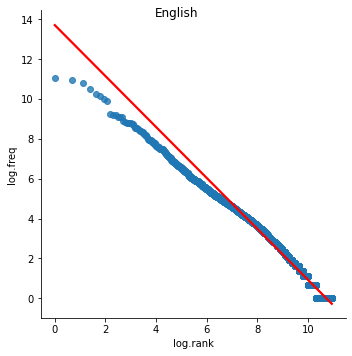

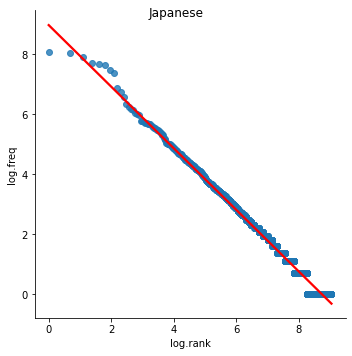

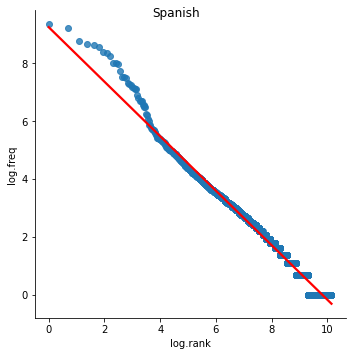

In [ ]:
# English
## Create the plot
en_word_plot = sns.lmplot(x ='log.rank', y='log.freq', data=en_dat, fit_reg=True, line_kws={'color': 'red'})

## Extract the plot
fig = en_word_plot.fig 

## Add a title
fig.suptitle("English", fontsize=12)

## Show the plot
fig.show()

# Japanese
jp_word_plot = sns.lmplot(x ='log.rank', y='log.freq', data=jp_dat, fit_reg=True, line_kws={'color': 'red'})
fig = jp_word_plot.fig 
fig.suptitle("Japanese", fontsize=12)
fig.show()

# Spanish
es_word_plot = sns.lmplot(x ='log.rank', y='log.freq', data=es_dat, fit_reg=True, line_kws={'color': 'red'})
fig = es_word_plot.fig 
fig.suptitle("Spanish", fontsize=12)
fig.show()

The lines look remarkably similar, don't they?

Now we try with other linguistic levels!

For example, let's try part-of-speech tags. For this, we need the `.tagged_words()` method of our corpus objects (except Japanese; see below)
- returns a generator of tuples of the form `("word", "tag")`

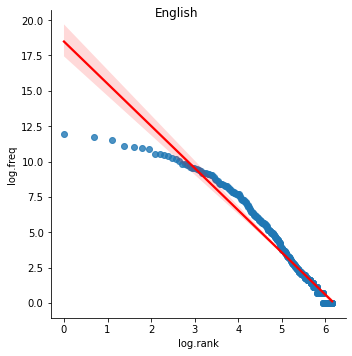

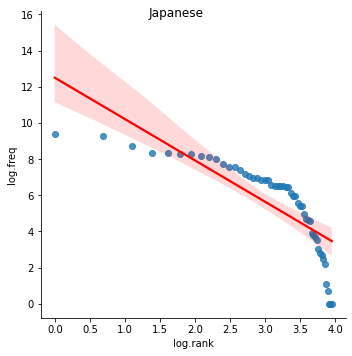

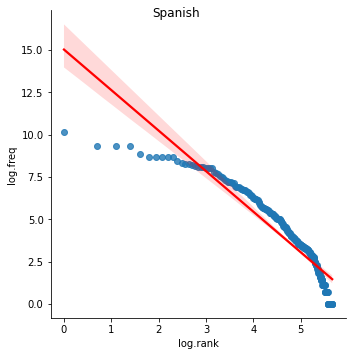

In [ ]:
# English
## Extract the data
en_tag_dat = zipf([t for _,t in brown.tagged_words()])

## Create the plot
en_tag_plot = sns.lmplot(x ='log.rank', y='log.freq', data=en_tag_dat, fit_reg=True, line_kws={'color': 'red'})

## Extract the plot
fig = en_tag_plot.fig 

## Add a title
fig.suptitle("English", fontsize=12)

## Show the plot
fig.show()

# Japanese (need to apply some tags with spaCy; they are difficult to extract from the corpus)
## Tag the corpus at the sentence level (need .join() as spaCy expects a string as input)
jp_tagged = [(w.orth_, w.tag_) for sent in knbc.sents() for w in nlp_jp(" ".join(sent))]

## Now do the rest
jp_tag_dat = zipf([t for _,t in jp_tagged])
jp_tag_plot = sns.lmplot(x ='log.rank', y='log.freq', data=jp_tag_dat, fit_reg=True, line_kws={'color': 'red'})
fig = jp_tag_plot.fig 
fig.suptitle("Japanese", fontsize=12)
fig.show()

# Spanish
## Extract the da
es_tag_dat = zipf([t for _,t in cess_esp.tagged_words()])
es_tag_plot = sns.lmplot(x ='log.rank', y='log.freq', data=es_tag_dat, fit_reg=True, line_kws={'color': 'red'})
fig = es_tag_plot.fig 
fig.suptitle("Spanish", fontsize=12)
fig.show()



Uh-oh! What's happening here? Why do we now see some curvature if Zipf is right? Can you (a) describe what is happening here and (b) come up with an explanation? 

**Now** how about doing this with lemmas? Dependencies? 

In [ ]:
!pip3 install prosodic
import prosodic


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 5.2 MB/s 
     |████████████████████████████████| 2.0 MB 57.8 MB/s 
     |████████████████████████████████| 1.6 MB 49.5 MB/s 
     |████████████████████████████████| 2.0 MB 44.5 MB/s 
     |████████████████████████████████| 104 kB 62.8 MB/s 
     |████████████████████████████████| 76 kB 6.4 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
  Created wheel for prosodic: filename=prosodic-1.6.1-py3-none-any.whl size=1165624 sha256=9010c1db668ddfa1dd5c6c32e193b47279f02bf5f8dad017ec9f0efb939dccdc
  Stored in directory: /root/.cache/pip/wheels/37/3d/fc/a107da647d5e4cea24949a7966286fd5a5057732bb5b746750
  Created wheel for p-tqdm: filename=p_tqdm-1.3.3-py3-none-any.whl size=3987 sha256=a4f4a78099ae2283592a5ddf3c94e92e511b88548e6f7fac8f572413b965c1c7
  Stored in directory: /root/.cache/pip/wheels/57/6c/d6/8c4cc7d253ecfdfe0fb49f5a754d33e9

In [ ]:
import prosodic as p

t = p.Text("Let's try the parser.")

print(t.words()[1].syllables())

[<Syllable.try> ['traɪ]]


# Menzerath's law
Longer words (for example, words that are composed of more sounds or syllables) are 

Why might that be?

Altmann formalizes the law as follows (referred to as the **Menzerath-Altmann law**):
$$y = a \cdot x^b \cdot e^{-cx} $$

## Task
For each sentence
- record its length in words
- record the length of each individual word
- store the output in a `pandas` table of the following ("long") form.

(We will use an example pair of sentences: "How have you been?" and "Goodbye!")

|sent.length|word.length|word|
|---|---|---|
|4|3|how
|4|4|have
|4|3|you
|4|4|been
|1|7|goodbye

- for now, just ignore punctuation. For a better challenge, try removing non-word characters
- once you have your table, plot the results

In [ ]:
from numpy import mean
from random import sample

def menzareth(corpus):
  df = pd.DataFrame(columns = ['sent.len', 'mean.word.len'])
  i = 0
  file_ids = sample(corpus.fileids(), 500)
  corpus_sents = corpus.sents(fileids = file_ids)
  for sent in corpus_sents:
    word_lens = []
    sent_len = len(sent)
    for word in sent:
      word_lens += [len(word)]
    mean_word_len = mean(word_lens)
    df.loc[i] = [sent_len, mean_word_len]
    i += 1
  return(df)

en_menz = menzareth(brown)
jp_menz = menzareth(knbc)
sp_menz = menzareth(cess_esp)

Now for some plots!

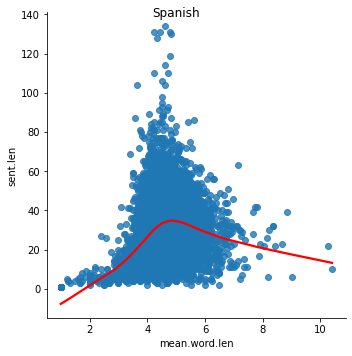

In [ ]:
import seaborn as sns

# English
## Create the plot
sp_menz_plot = sns.lmplot(x ='mean.word.len', y='sent.len', data=sp_menz, line_kws={'color': 'red'}, lowess=True, ci = 95)

## Extract the plot
fig = sp_menz_plot.fig 

## Add a title
fig.suptitle("Spanish", fontsize=12)

## Show the plot
fig.show()

# Heaps' law
The number of unique units that one should find in a text (the **type count**) varies with respect to document length according to the following function:

$$V_R(n) = Kn^B$$

where $V_R$ is type count (*vocabulary size*), *n* is the length of document in units (words, phonemes, etc), and *K* and *B* are parameters which are tuned to fit the dataset. 
  
The constant *K* is a positive real (e.g., 10) which causes $V_R(n)$ to grow linearly.
  
*B* typically falls between 0 and 1 to penalize the growth of the vocabulary estimate. 

Let's set K to 50 and B to 0.5. 